## **Modules**

In [191]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from collections import Counter
import ipywidgets as widgets
from ipywidgets import interact
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

# **1. Joint PDF, PMF and CDF**

### **Question 1: Joint PMF of Two Dice**

Write a Python function that computes the joint probability mass function (PMF) of the sum of two fair six-sided dice. The function should:

Generate all possible outcomes of rolling two six-sided dice.

Compute and return the joint PMF as a dictionary, where keys are tuples
(𝑋,𝑌) representing the outcomes of the two dice, and values are the corresponding probabilities.

In [192]:
def jointpmf():
    sides = 6
    outcomes = []
    for x in range(1, sides + 1):
        for y in range(1, sides + 1):
            outcomes.append((x, y))
    probability = 1 / (sides * sides)
    pmf = {outcome: probability for outcome in outcomes}
    return pmf
print(f"The joint pmf of two dice is {jointpmf()}")

The joint pmf of two dice is {(1, 1): 0.027777777777777776, (1, 2): 0.027777777777777776, (1, 3): 0.027777777777777776, (1, 4): 0.027777777777777776, (1, 5): 0.027777777777777776, (1, 6): 0.027777777777777776, (2, 1): 0.027777777777777776, (2, 2): 0.027777777777777776, (2, 3): 0.027777777777777776, (2, 4): 0.027777777777777776, (2, 5): 0.027777777777777776, (2, 6): 0.027777777777777776, (3, 1): 0.027777777777777776, (3, 2): 0.027777777777777776, (3, 3): 0.027777777777777776, (3, 4): 0.027777777777777776, (3, 5): 0.027777777777777776, (3, 6): 0.027777777777777776, (4, 1): 0.027777777777777776, (4, 2): 0.027777777777777776, (4, 3): 0.027777777777777776, (4, 4): 0.027777777777777776, (4, 5): 0.027777777777777776, (4, 6): 0.027777777777777776, (5, 1): 0.027777777777777776, (5, 2): 0.027777777777777776, (5, 3): 0.027777777777777776, (5, 4): 0.027777777777777776, (5, 5): 0.027777777777777776, (5, 6): 0.027777777777777776, (6, 1): 0.027777777777777776, (6, 2): 0.027777777777777776, (6, 3): 0.

### **Question 2: Joint CDF of Two Dice**

Write a Python function that calculates the joint cumulative distribution function (CDF) for rolling two six-sided dice. The function should:

Accept two integers a and b, representing dice outcomes up to which the CDF is computed.

Compute 𝑃(𝑋≤𝑎,𝑌≤𝑏) which is the probability that the first die is at most a and the second die is at most b.

In [193]:
def jointcdf(a, b, sides=6):
    outcomes = []
    for i in range(6):
        for j in range(6):
            x = i + 1
            y = j + 1
            outcomes.append([x, y])
    outcomes = torch.tensor(outcomes, dtype=torch.int)
    count = torch.sum((outcomes[:, 0] <= a) & (outcomes[:, 1] <= b)).item()
    total = sides * sides
    probability = count / total

    return probability
result = jointcdf(6, 6)
print(f"Joint CDF for (6, 6): {result:.4f}")

Joint CDF for (6, 6): 1.0000


# **2. Joint Expectation**

### **Question 1: Monte Carlo Estimation of Joint Expectation**

**Objective:** Implement a Monte Carlo simulation to estimate the expected value of a function of two jointly distributed random variables.

**Problem Statement:**  
Let $X$ and $Y$ be two continuous random variables with joint probability density function (PDF):
$$
f_{X,Y}(x, y) = \begin{cases}
2(1 - y), & 0 \leq x \leq 1, 0 \leq y \leq 1 \\
0, & \text{otherwise}
\end{cases}
$$

Define the function $ g(X, Y) = X^2 + Y $.  
Using Monte Carlo simulation:jointpmf()
1. Generate $ N = 10,000 $ samples of $(X, Y)$ from the given joint distribution.
2. Estimate $ E[g(X, Y)] = E[X^2 + Y] $.
3. Compare your empirical estimate with the analytical solution.

**Instructions:**  
- Plot the sampled distribution of $(X, Y)$.
- Compute and report the relative error between the estimated and analytical expectation.

Empirical mean: 0.6676
Analytical mean: 0.6667
Relative error: 0.0013


/tmp/ipykernel_6103/4136168623.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_samples = torch.tensor(y_samples)


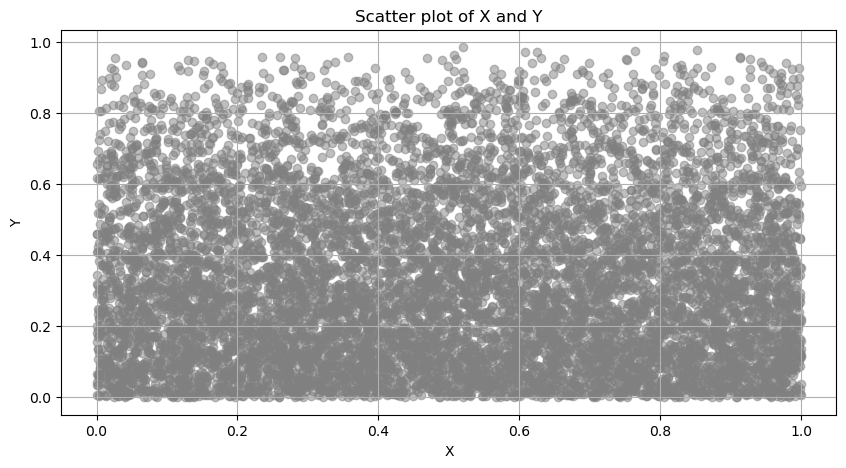

In [194]:
def inverse_sampling_y(N=10000):
    U = torch.rand(N)
    y_samples = 1-np.sqrt(1-U)
    y_samples = torch.tensor(y_samples)
    return y_samples

N = 10000
X = torch.rand(N)
Y = inverse_sampling_y(N)
g = X**2 + Y
emp_mean = torch.mean(g)
anal_mean = 2/3
print(f"Empirical mean: {emp_mean:.4f}")
print(f"Analytical mean: {anal_mean:.4f}")
err = abs(emp_mean - anal_mean)/anal_mean
print(f"Relative error: {err:.4f}")

plt.figure(figsize=(10, 5))
plt.scatter(X, Y, alpha=0.5, color = 'Grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X and Y')
plt.grid()
plt.show()


### **Question 2: Linearity of Expectation in Joint Distributions**

**Objective:** Verify the linearity property of expectation using joint distributions.

**Problem Statement:**  
For any two random variables $ X $ and $ Y $, the expectation satisfies:

$$
E[aX + bY] = aE[X] + bE[Y]
$$

for constants $ a, b $. Using the joint PDF from Question 1:

**Tasks:**
1. Choose arbitrary values for $ a $ and $ b $.
2. Compute $ E[aX + bY] $ analytically and using Monte Carlo simulation.
3. Compute $ aE[X] + bE[Y] $ analytically and using Monte Carlo simulation.
4. Compare both results and compute the relative error.
5. Discuss why the linearity of expectation holds regardless of dependence between $ X $ and $ Y $.
torch.rand(N)torch.rand(N)

In [195]:
a,b = 3,5
Z1 = a*X + b*Y
emp_mean_1 = torch.mean(Z1)
emp_mean_2 = a*torch.mean(X) + b*torch.mean(Y)
print(f"{a}E[X]+{b}E[Y]: {emp_mean_2:.4f}")
err1 = abs(emp_mean_1 - emp_mean_2)/emp_mean_2
print(f"E[{a}X+{b}Y]: {emp_mean_1:.4f}")
real_mean = a/2 + b/3
print(f"Real mean: {real_mean:.4f}")
err2 = abs(emp_mean_1 - real_mean)/real_mean
print(f"Relative error: {err2:.4f}")

3E[X]+5E[Y]: 3.1681
E[3X+5Y]: 3.1681
Real mean: 3.1667
Relative error: 0.0004


# **3. Correlation and covariance**

### **Question 1: Correlation Matrix and Identifying Highly Correlated Features**  
Given a batch of N samples with d features, implement a PyTorch function that computes the correlation matrix (from scratch without using torch.corrcoef) for the dataset. And then Identify Highly Correlated Features which are above a given threshold (e.g., 0.8). Return a list of feature pairs along with their correlation values.

#### **Example:**  
```python
import torch

def correlation_matrix(X):

def highly_correlated_features(X, threshold=0.8):

X = torch.randn(100, 5)
print(correlation_matrix(X))
print(highly_correlated_features(X, 0.1))


```

In [196]:
def correlation_matrix(X):
    X = X - X.mean()
    N = X.shape[0]
    cov = (X.T @ X) / (N - 1)
    std = torch.sqrt(torch.diag(cov))
    corr = cov / std[:, None] / std[None, :]
    return corr

def highly_correlated_features(X, threshold=0.8):
    corr = correlation_matrix(X)
    d = corr.shape[0]
    correlated_features = []
    for i in range(d):
        for j in range(i + 1, d):
            if abs(corr[i, j]) > threshold:
                correlated_features.append((i, j))
    return correlated_features

X = torch.randn(100, 5)
print(correlation_matrix(X))
print(highly_correlated_features(X, 0.1))


tensor([[ 1.0000,  0.0156,  0.1148,  0.0248,  0.0725],
        [ 0.0156,  1.0000, -0.0393, -0.0839,  0.0324],
        [ 0.1148, -0.0393,  1.0000, -0.0069, -0.0529],
        [ 0.0248, -0.0839, -0.0069,  1.0000,  0.0342],
        [ 0.0725,  0.0324, -0.0529,  0.0342,  1.0000]])
[(0, 2)]


### **Question 2: Weighted Covariance**  
Compute a weighted covariance between two 1D PyTorch tensors `x` and `y`, where each sample pair `(x[i], y[i])` is assigned a weight `w[i]` from a weights tensor `weights`.

In the **weighted** version, each sample pair `(x[i], y[i])` is multiplied by a weight `w[i]`, and the means and covariance are adjusted accordingly. The weighted covariance formula becomes:

$$ \text{Cov}_w(X, Y) = \frac{1}{\sum w_i - 1} \sum_{i=1}^{n} w_i (x_i - \bar{x}_w)(y_i - \bar{y}_w) $$

where:

$$ \bar{x}_w = \frac{\sum w_i x_i}{\sum w_i} $$
$$ \bar{y}_w = \frac{\sum w_i y_i}{\sum w_i} $$



In [197]:
N = 10000
torch.manual_seed(0)
x = torch.rand(N)
y = torch.rand(N)
w = torch.rand(N)

x_w_mean = torch.mean(x*w)
y_w_mean = torch.mean(y*w)
x_w_centered = x - x_w_mean
y_w_centered = y - y_w_mean
cov = torch.sum(x_w_centered * y_w_centered)/(torch.sum(w) - 1)
print(f"Weighted covariance: {cov:.4f}")

Weighted covariance: 0.1239


# **4. Conditional Distributions**

### **Question 1:**

Let $X$ and $Y$ be continuous random variables with the joint PDF:

$
f_{X,Y}(x,y) = 2 e^{-x} e^{-y}, \quad {0} \leq {y} \leq {x} < \infty
$

Write a Python program that:

1. Computes the **marginal PDF** $(f_Y(y))$ for $y=1$:

   $
   f_Y(y) = \int_{y}^{\infty} f_{X,Y}(x,y) \, dx
   $

2. Computes the **conditional PDF** $( f_{X|Y}(x | y))$ for $x=2$ and $y=1$:

   $
   f_{X|Y}(x | y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}
   $


In [198]:
f = lambda x,y: 2*torch.exp(-x-y)

x = torch.linspace(1, 20, 10000)
y = 1
f_y = torch.trapz(f(x, y), x)
print(f_y.item())
x = torch.tensor(2)
f_x_given_y = f(x,y) / f_y

print(f_x_given_y.item())

0.27067065238952637
0.36787930130958557


### **Question 2:**

A binary signal \( X \) is transmitted over a noisy channel:

$
X =
\begin{cases}
+1, & \text{with probability } \frac{1}{2} \\
-1, & \text{with probability } \frac{1}{2}
\end{cases}
$

The received signal is modeled as:

$
Y = X + N, \quad N \sim \mathcal{N}(0,1)
$

where $( N $) is Gaussian noise with mean 0 and variance 1.

**To do:**

1. Compute and plot the likelihood function $( P(Y | X) )$.
2. Use **Bayes' theorem** to compute and plot the posterior probability:

   $
   P(X = +1 | Y > 0)
   $

3. Create a **3D surface plot** to visualize $P(X | Y)$ as a function of both $( X )$ and $( Y )$.


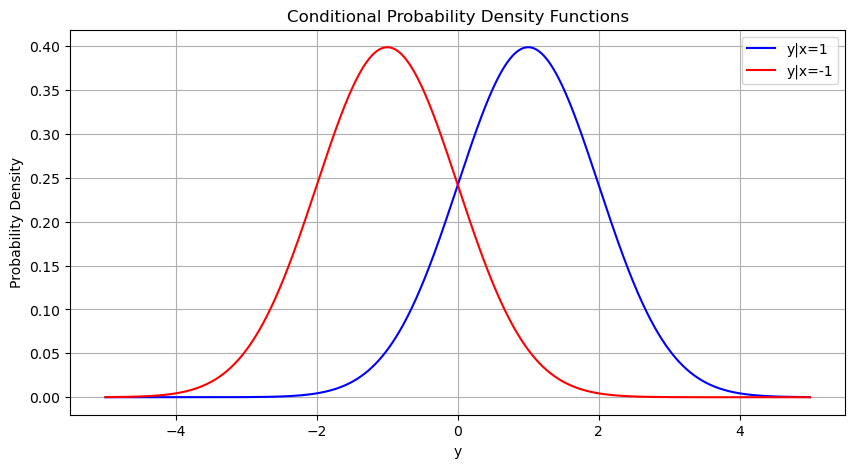

In [199]:
y = torch.linspace(-5,5,10000)
normal_pos = torch.distributions.Normal(loc=1.0, scale=1.0)
normal_neg = torch.distributions.Normal(loc=-1.0, scale=1.0)
y_x_pos = torch.exp(normal_pos.log_prob(y))
y_x_neg = torch.exp(normal_neg.log_prob(y))
plt.figure(figsize=(10, 5))
plt.plot(y,y_x_pos, label='y|x=1', color='blue')
plt.plot(y,y_x_neg, label='y|x=-1', color='red')
plt.xlabel('y')
plt.ylabel('Probability Density')
plt.title('Conditional Probability Density Functions')
plt.legend()
plt.grid()
plt.show()

P(X=1|Y>0): 0.84


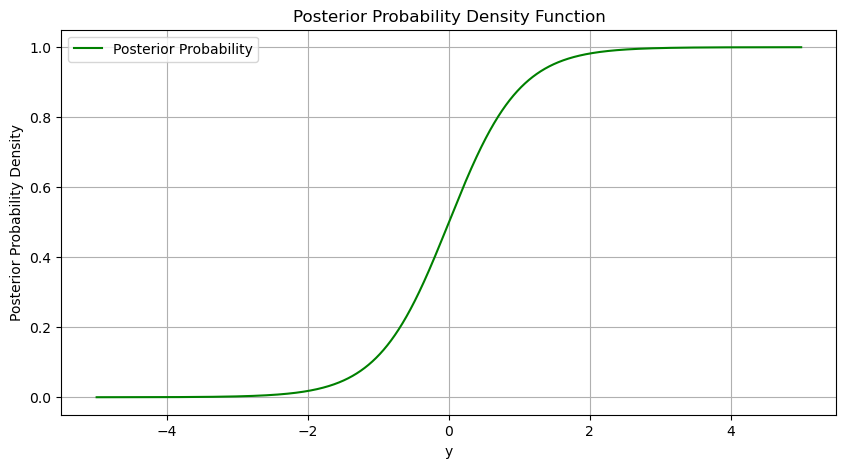

In [200]:
mask = y>0
p = 0.5 #probability of X=1
p_y = p*y_x_pos + (1-p)*y_x_neg
numerator = torch.trapz(p*y_x_pos[mask], y[mask])
denominator = torch.trapz(p_y[mask], y[mask])
p_x_given_y = numerator / denominator
print(f"P(X=1|Y>0): {p_x_given_y.item():.2f}")

posterior_prob = (p*y_x_pos)/p_y
plt.figure(figsize=(10, 5))
plt.plot(y, posterior_prob, label='Posterior Probability', color='green')
plt.xlabel('y')
plt.ylabel('Posterior Probability Density')
plt.title('Posterior Probability Density Function')
plt.legend()
plt.grid()
plt.show()

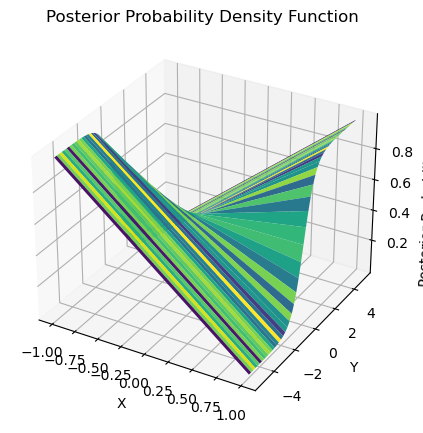

In [201]:
x = torch.tensor([-1.0,1.0])
y_grid, x_grid = torch.meshgrid(y, x)
p = 0.5

likelihood_dist = torch.distributions.Normal(loc=x_grid, scale=1.0)
likelihood = likelihood_dist.log_prob(y_grid)
likelihood = torch.exp(likelihood)
posterior = p * likelihood / (
    p * torch.exp(torch.distributions.Normal(loc=1.0, scale=1.0).log_prob(y_grid)) +
    (1 - p) * torch.exp(torch.distributions.Normal(loc=-1.0, scale=1.0).log_prob(y_grid))
)


fig =  plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid.numpy(), y_grid.numpy(), posterior.numpy(), cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Posterior Probability Density')
ax.set_title('Posterior Probability Density Function')
plt.show()

# **5. Conditional expectation**

### **Question 1:**
You roll two fair 6-sided dice. Let S be the sum of the two dice, and let M be the maximum of the two dice.

- Theoretical Computation:

  Compute the unconditional expectation E[M], the expected maximum of two dice rolls.

  Compute the conditional expectation E[M∣S is even], the expected maximum given that the sum is even.

- Write a Python function simulate_dice_rolls(n) that:

  Simulates rolling two dice n times.

  Estimates both E[M] and E[M∣S is even].

  Compares the estimated values with the theoretical results.

  Run the function for 10,000 simulations and interpret the results.



In [202]:
import torch

def theoretical_m():
    t, t_even, c, c_even = 0, 0, 0, 0

    for i in range(1, 7):
        for j in range(1, 7):
            t += max(i, j)
            c += 1
            if (i + j) % 2 == 0:
                t_even += max(i, j)
                c_even += 1
    return t / c, t_even / c_even

theoretical_m_value, theoretical_m_even_value = theoretical_m()

def simulate_dice_rolls(num_rolls=10000):
    rolls_1 = torch.randint(1, 7, (num_rolls,))
    rolls_2 = torch.randint(1, 7, (num_rolls,))
    return rolls_1, rolls_2

x, y = simulate_dice_rolls(10000)
x,y = x.float(), y.float()
M = torch.maximum(x, y)
S = x + y
expect_m = M.mean()
expect_m_s_even = torch.mean(M[S % 2 == 0])  

print(f"Simulated E[M]: {expect_m:.4f}")
print(f"Theoretical E[M]: {theoretical_m_value:.4f}")
print(f"Simulated E[M|S even]: {expect_m_s_even:.4f}")
print(f"Theoretical E[M|S even]: {theoretical_m_even_value:.4f}")


Simulated E[M]: 4.4697
Theoretical E[M]: 4.4722
Simulated E[M|S even]: 4.3889
Theoretical E[M|S even]: 4.3889


# **6. Sum of two random variables**

### **Question 1:**
Write a Python program to simulate the sum of two independent discrete uniform random variables \( X \) and \( Y \), where both are uniformly distributed over \{0, 1, 2, 3\}.

- Generate **100,000** random samples of \( X \) and \( Y \).
- Compute \( Z = X + Y \) for each sample.
- Plot the empirical probability mass function (PMF) of \( Z \) using Matplotlib.
- Compare the simulated PMF with the theoretical PMF.


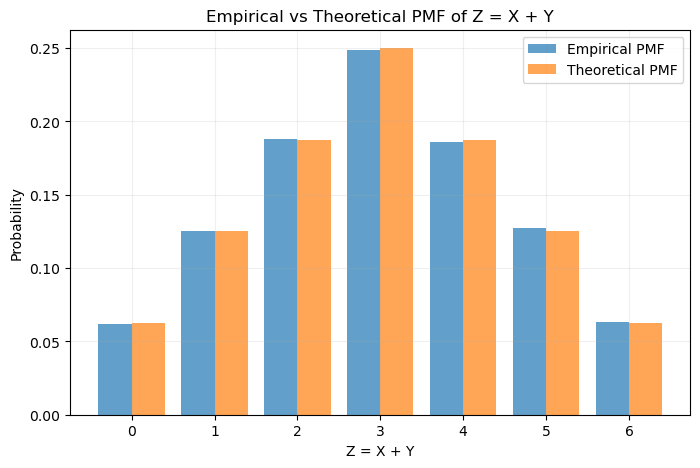

In [203]:
num_samples = 100000
X = torch.randint(0, 4, (num_samples,))
Y = torch.randint(0, 4, (num_samples,))
Z = X + Y

z_vals, counts = torch.unique(Z, return_counts=True)
empirical_pmf = counts.float() / num_samples

theoretical_pmf_dict = {
    0: 1, 1: 2, 2: 3, 3: 4,
    4: 3, 5: 2, 6: 1
}
total_pairs = 16
theoretical_pmf = torch.tensor([theoretical_pmf_dict[k.item()] / total_pairs for k in z_vals])

plt.figure(figsize=(8, 5))
plt.bar(z_vals.numpy()-0.2, empirical_pmf.numpy(), label='Empirical PMF', width=0.4, alpha = 0.7)
plt.bar(z_vals.numpy()+0.2, theoretical_pmf.numpy(), label='Theoretical PMF', width=0.4, alpha = 0.7)

plt.xlabel("Z = X + Y")
plt.ylabel("Probability")
plt.title("Empirical vs Theoretical PMF of Z = X + Y")
plt.legend()
plt.grid(True,alpha=0.2)
plt.xticks(range(0, 7))
plt.show()


# **7. Examples of sum of two random variables**

### **Question 1: Numerical Convolution of Exponential PDFs**

Let \(X\) and \(Y\) be independent random variables with PDFs:

\
f_X(x) =
\begin{cases}
x e^{-x}, & x \geq 0 \\
0, & \text{otherwise}
\end{cases}

f_Y(y) =
\begin{cases}
y e^{-y}, & y \geq 0 \\
0, & \text{otherwise}
\end{cases}


**Task**:  
1. Numerically compute the PDF of \(Z = X + Y\)
2. Compare your numerical result with the analytical solution:
   \[
   f_Z(z) =
   \begin{cases}
   \dfrac{z^3}{6} e^{-z}, & z \geq 0 \\
   0, & \text{otherwise}
   \end{cases}
   


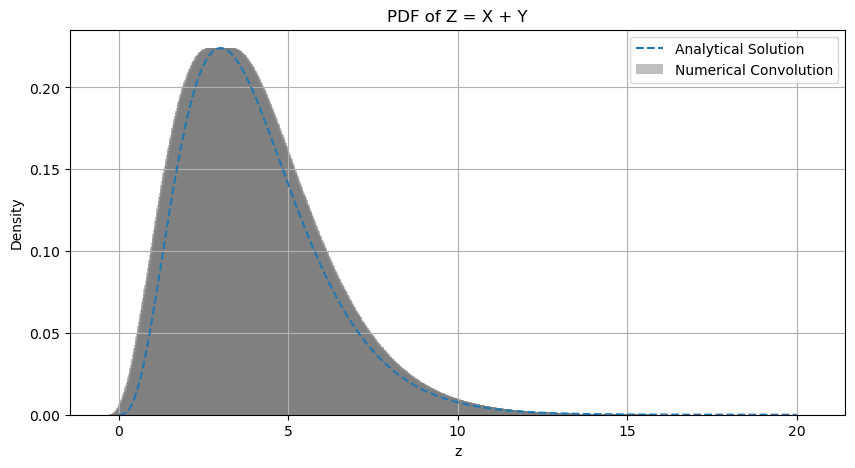

In [204]:
f_X = lambda x: x * torch.exp(-x)
f_Y = lambda y: y * torch.exp(-y)
f_Z_analytical = lambda z: (z**3) * torch.exp(-z) / 6

z_vals = torch.linspace(0, 20, 1000)
dz = z_vals[1] - z_vals[0]

f_Z_numeric = torch.zeros_like(z_vals)

for i, z in enumerate(z_vals):
    x = torch.linspace(0, z.item(), 1000)
    fx = f_X(x)
    fy = f_Y(z - x)
    f_Z_numeric[i] = torch.trapz(fx * fy, x)

plt.figure(figsize=(10, 5))
plt.bar(z_vals.numpy(), f_Z_numeric.numpy(), label='Numerical Convolution', lw=2, alpha=0.5,color='gray')
plt.plot(z_vals.numpy(), f_Z_analytical(z_vals).numpy(), label='Analytical Solution', linestyle='--')
plt.xlabel('z')
plt.ylabel('Density')
plt.title('PDF of Z = X + Y')
plt.legend()
plt.grid(True)
plt.show()

### **Question 2: Simulate the sum of two Gaussian variables**
X
∼
N
(
1
,
2
)
 and
Y
∼
N
(
3
,
4
)
 and verify that
X
+
Y
∼
N
(
4
,
6
)


Empirical Mean of Z = X + Y: 3.9950
Empirical Variance of Z = X + Y: 5.9972
Expected: Mean = 4, Variance = 6


/tmp/ipykernel_6103/4294275104.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x.numpy(), y.numpy(), 'r-', label='Theoretical N(4, 6)', linewidth=2, color='red')


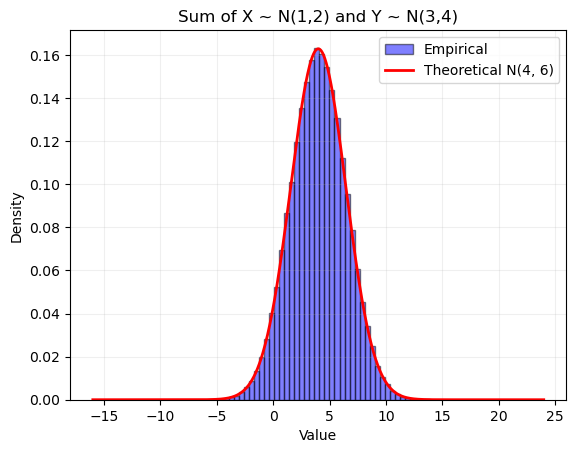

In [205]:
X_dist = torch.distributions.Normal(1,torch.sqrt(torch.tensor(2.0)))
Y_dist = torch.distributions.Normal(3,2)
n = 100000
X_samples = X_dist.sample((n,))
Y_samples = Y_dist.sample((n,))
Z_samples = X_samples + Y_samples

empirical_mean = Z_samples.mean().item()
empirical_var = Z_samples.var().item()

print(f"Empirical Mean of Z = X + Y: {empirical_mean:.4f}")
print(f"Empirical Variance of Z = X + Y: {empirical_var:.4f}")
print("Expected: Mean = 4, Variance = 6")

plt.hist(Z_samples.numpy(),edgecolor='black', bins=50, density=True, alpha=0.5, color='blue', label='Empirical')

x = torch.linspace(-16, 24, 1000)
Z_theoretical = torch.distributions.Normal(4, torch.sqrt(torch.tensor(6.0)))
y = torch.exp(Z_theoretical.log_prob(x))
plt.plot(x.numpy(), y.numpy(), 'r-', label='Theoretical N(4, 6)', linewidth=2, color='red')

plt.title('Sum of X ~ N(1,2) and Y ~ N(3,4)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True,alpha=0.2)
plt.show()

# **8. Jensen's Inequality**

### **Question 1:**

Jensen’s inequality states that for a convex function $f(x)$ and a random variable $X$:

$$
f(\mathbb{E}[X]) \leq \mathbb{E}[f(X)]
$$

Task:

- Choose a convex function $f(x)$ (e.g. $f(x) = x^2$ or $f(x) = e^x$)
- Generate random samples of $X$ from a given probability distribution (e.g., Normal, Uniform, or Exponential).
- Compute both sides of Jensen’s inequality using Python.
- Compare the results and check if Jensen’s inequality holds.

What would happen if you now take a concave function? What did you observe?

How does the different between $f(\mathbb{E}[X])$ and $\mathbb{E}[f(X)]$ change for different distributions? Write down all your observations in markdown cell.



In [206]:
X = torch.distributions.Normal(0, 1)
X_samples = X.sample((10000,))
f = lambda x: x**2
f_X = f(X_samples)
mean_fx = f_X.mean().item()
f_mean = f(X_samples.mean()).item()

print(f"E[f(x)]: {mean_fx:.4f}")
print(f"f(E[X]): {f_mean:.4f}")
print(f"Jensen's inequality: {mean_fx >= f_mean}")

E[f(x)]: 1.0043
f(E[X]): 0.0000
Jensen's inequality: True


In [207]:
X = torch.distributions.Uniform(0, 1)
X_samples = X.sample((10000,))
f = lambda x: x**2
f_X = f(X_samples)
mean_fx = f_X.mean().item()
f_mean = f(X_samples.mean()).item()

print(f"E[f(x)]: {mean_fx:.4f}")
print(f"f(E[X]): {f_mean:.4f}")
print(f"Jensen's inequality: {mean_fx >= f_mean}")

E[f(x)]: 0.3347
f(E[X]): 0.2523
Jensen's inequality: True


In [208]:
X = torch.distributions.Exponential(1)
X_samples = X.sample((10000,))
f = lambda x: x**2
f_X = f(X_samples)
mean_fx = f_X.mean().item()
f_mean = f(X_samples.mean()).item()

print(f"E[f(x)]: {mean_fx:.4f}")
print(f"f(E[X]): {f_mean:.4f}")
print(f"Jensen's inequality: {mean_fx >= f_mean}")

E[f(x)]: 2.0454
f(E[X]): 1.0279
Jensen's inequality: True


#### **Answer**
1. If f(x) is concave (-$x^{2}$), then the inequality sign changes
2. The difference between E[f(x)] and f(E[x]) is least for Uniform, then Exponential and then for Normal distribution,
The difference between them was observed to increase with the increase of variance, hinting that there is some relation between variance and the difference 
$$E[f(x)] - f(E[x]) \simeq (f'')*var$$

# **9. Markov and Chebyshev inequality**

### **Question 1: Markov inequality**
Let $X$ be a non-negative random variable with an expected value $\mathbb{E}[X] = 10$. Markov’s inequality states that for any $a > 0$:

$$
P(X \geq a) \leq \frac{\mathbb{E}[X]}{a}
$$

---

## **Tasks**
1. **Analytical Task:**  
   Use Markov’s inequality to find an upper bound on $P(X \geq 25)$.

2. **Coding Task:**  
   - Simulate 100,000 samples from an **Exponential distribution** with rate $\lambda = \frac{1}{10}$, which has an expected value of $\mathbb{E}[X] = 10$.  
   - Estimate $P(X \geq 25)$ empirically using the generated samples.  

3. **Comparison:**  
   - Compare the empirical probability with the Markov bound.  
   - Discuss whether the bound is tight.

---

## **Hints**
- The exponential distribution with rate $\lambda$ has mean $\frac{1}{\lambda}$.


#### **Analytical Task**:
$P(X\geq 25) \leq \frac{10}{25} \simeq 0.4$

In [209]:
Exp_Dist = torch.distributions.Exponential(0.1)
X_samples = Exp_Dist.sample((100000,))
prob_est = torch.mean((X_samples >= 25).float()).item()
print(f"P(X >= 25): {prob_est:.4f}")


P(X >= 25): 0.0815


#### **Comparision**
- The Empirical probability is less than the Markov bound
- No, the bound is not tight as the gap between the bound and actual value is very large (in this case 5x)

### **Question 2: Chebyshev’s Inequality**

For a set of i.i.d. random variables $X_1, X_2, \dots, X_N$ with mean $\mu = 5$ and variance $\sigma^2 = 4$, the sample mean is:

$$
\bar{X} = \frac{1}{N} \sum_{i=1}^{N} X_i
$$

Chebyshev’s inequality states:

$$
P(|\bar{X} - \mu| \geq k) \leq \frac{\sigma^2}{N k^2}
$$

### **Tasks**

1. **Analytical Task:**
   - Use Chebyshev’s inequality to find an upper bound for $P(|\bar{X} - 5| \geq 1)$ for $N = 10$ and $N = 100$.

2. **Coding Task:**
   - Simulate 100,000 trials where you compute sample means for $N = 10$ and $N = 100$, assuming each $X_i \sim U[3, 7]$ (uniform distribution on the interval [3, 7]).
   - Estimate $P(|\bar{X} - 5| \geq 1)$ empirically from the simulations.

3. **Comparison and Discussion:**
    - Compare the simulated probabilities with the theoretical bounds. Discuss how the probability behaves as $ N \to \infty $, linking this to the **Weak Law of Large Numbers**.

#### **Analytical Task**:
Upper bound for $P(|\bar{X} - 5| \geq 1)$ for $N = 10$ and $N = 100$ are respectively 0.4 and 0.04

In [210]:
def estimate_prob(N,n_trials=100000):
    samples = torch.distributions.Uniform(3,7).sample((N, n_trials))
    means = samples.mean(dim=0)
    p_emp = (means.sub(5.0).abs() >= 1.0).float().mean().item()
    cheby_bound = 4.0 / N
    return p_emp, cheby_bound

p_emp_100, cheby_bound_100 = estimate_prob(100)
p_emp_10, cheby_bound_10 = estimate_prob(10)
print(f"Empirical Probability (N=100): {p_emp_100:.4f}")
print(f"Chebyshev Bound (N=100): {cheby_bound_100:.4f}")
print(f"Empirical Probability (N=10): {p_emp_10:.4f}")
print(f"Chebyshev Bound (N=10): {cheby_bound_10:.4f}")

Empirical Probability (N=100): 0.0000
Chebyshev Bound (N=100): 0.0400
Empirical Probability (N=10): 0.0052
Chebyshev Bound (N=10): 0.4000
